# Analyse RFM

Tout d'abord, il s'agit de faire un premier tri parmis les features, certaines n'étant probablement pas pertinentes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

raw_datas = pd.read_csv("POLIST_09_final_raw_dataset.csv")
raw_datas

,order_id,customer_unique_id,customer_state,delivering_time,delivered_before_time,nb_score,score_mean,init_score,diff_score,purchase_date,purchase_y_m,purchase_y_q,purchase_y_s,purchase_y,days_last_purchase,sequential_max,pay_sum,installments_min,installments_max,installments_mean,installments_size,type_boleto,type_credit_card,type_debit_card,type_voucher,price_min,price_mean,price_max,price_sum,freight_value_min,freight_value_mean,freight_value_max,freight_value_sum,product_description_lenght_min,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,product_photos_qty_mean,product_photos_qty_max,weight_min,weight_mean,weight_max,nb_product_min,nb_product_mean,nb_product_max,nb_product_sum,category__agro_industry_and_commerce,category__air_conditioning,category__art,category__arts_and_craftmanship,category__audio,category__auto,category__baby,category__bed_bath_table,category__books_general_interest,category__books_imported,category__books_technical,category__cds_dvds_musicals,category__christmas_supplies,category__cine_photo,category__computers,category__computers_accessories,category__consoles_games,category__construction_tools_construction,category__construction_tools_lights,category__construction_tools_safety,category__cool_stuff,category__costruction_tools_garden,category__costruction_tools_tools,category__diapers_and_hygiene,category__drinks,category__dvds_blu_ray,category__electronics,category__fashio_female_clothing,category__fashion_bags_accessories,category__fashion_childrens_clothes,category__fashion_male_clothing,category__fashion_shoes,category__fashion_sport,category__fashion_underwear_beach,category__fixed_telephony,category__flowers,category__food,category__food_drink,category__furniture_bedroom,category__furniture_decor,category__furniture_living_room,category__furniture_mattress_and_upholstery,category__garden_tools,category__health_beauty,category__home_appliances,category__home_appliances_2,category__home_comfort_2,category__home_confort,category__home_construction,category__housewares,category__industry_commerce_and_business,category__kitchen_dining_laundry_garden_furniture,category__kitchen_laptops_and_food_preparers,category__la_cuisine,category__luggage_accessories,category__market_place,category__music,category__musical_instruments,category__office_furniture,category__others,category__party_supplies,category__pc_gamer,category__perfumery,category__pet_shop,category__security_and_services,category__signaling_and_security,category__small_appliances,category__small_appliances_home_oven_and_coffee,category__sports_leisure,category__stationery,category__tablets_printing_image,category__telephony,category__toys,category__watches_gifts,seller_state__AC,seller_state__AM,seller_state__BA,seller_state__CE,seller_state__DF,seller_state__ES,seller_state__GO,seller_state__MA,seller_state__MG,seller_state__MS,seller_state__MT,seller_state__PA,seller_state__PB,seller_state__PE,seller_state__PI,seller_state__PR,seller_state__RJ,seller_state__RN,seller_state__RO,seller_state__RS,seller_state__SC,seller_state__SE,seller_state__SP
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,8.0,True,1,4.0,4,0,2017-10-02,201710,20174,20172,2017,331,3,38.71,1,1,1.0,3,0.0,1.0,0.0,2.0,29.99,29.99,29.99,29.99,8.72,8.72,8.72,8.72,268.0,268.0,268.0,4.0,4.0,4.0,1.0,1.0,1.0,1,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,BA,12.0,True,1,4.0,4,0,2018-07-24,201807,20183,20182,2018,36,1,141.46,1,1,1.0,1,1.0,0.0,0.0,0.0,118.70,118.70,118.70,118.70,22.76,22.76,22.76,22.76,178.0,178.0,

## Tri des features

Je peux exclure "product_photos_qty_min", "product_photos_qty_max", "product_description_lenght_min", "product_description_lenght_max", "sequential_max".

Vérifier les valeurs de "delivered_before_time" avant de décider quoi faire.

"customer_state" est censé être unique pour chaque client. Néanmoins, y-t-il eu des déménagements? Donc plusieurs valeurs pour un même client?


In [2]:
raw_datas.drop(["product_photos_qty_min", "product_photos_qty_max", "product_description_lenght_min", 
    "product_description_lenght_max", "sequential_max"], axis=1, inplace=True)

In [3]:
raw_datas.groupby(["delivered_before_time"]).size().reset_index()

,delivered_before_time,0
0,False,7804
1,True,88104


Y-t-il une corrélation entre la note du client et le fait que le colis ait été livré à temps?

<AxesSubplot:>

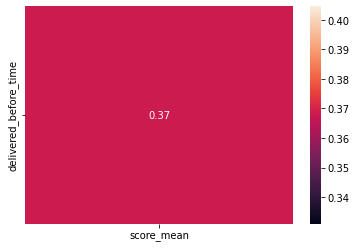

In [4]:
import seaborn as sns

sns.heatmap(raw_datas[["delivered_before_time", "score_mean"]].corr().filter(["score_mean"]).drop(["score_mean"]), annot=True)

In [5]:
def point_size(datas):
    bool_dict = {}
    bool_dict["True"] = {}
    bool_dict["False"] = {}
    bool_dict["Both"] = {}

    for i in range(len(datas)):
        score_val = datas.loc[i, "score_mean"]
        bool_val = datas.loc[i, "delivered_before_time"]
        if bool_val:
            if bool_dict["True"].get(score_val) is not None:
                bool_dict["True"][score_val] += 1
            else:
                bool_dict["True"][score_val] = 1
        else:
            if bool_dict["False"].get(score_val) is not None:
                bool_dict["False"][score_val] += 1
            else:
                bool_dict["False"][score_val] = 1
        if bool_dict["Both"].get(score_val) is not None:
            bool_dict["Both"][score_val] += 1
        else:
            bool_dict["Both"][score_val] = 1

    return bool_dict


In [6]:
points = point_size(raw_datas)

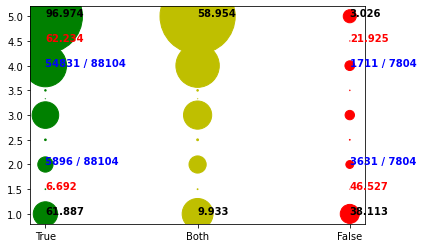

In [7]:
plt.scatter(["True" for x in range(len(points["True"]))], [x for x in points["True"].keys()], s= [x/10 for x in points["True"].values()], c= "g")
plt.scatter(["Both" for x in range(len(points["Both"]))], [x for x in points["Both"].keys()], s= [x/10 for x in points["Both"].values()], c= "y")
plt.scatter(["False" for x in range(len(points["False"]))], [x for x in points["False"].keys()], s= [x/10 for x in points["False"].values()], c= "r")

for i in [1, 5]:
    for j in ["True", "Both", "False"]:
        if j == "Both":
            plt.text(j, i, str(np.round(points["Both"][i] / len(raw_datas) *100, 3)), fontweight= "bold")
        else:
            plt.text(j, i, str(np.round(points[j][i] / points["Both"][i] *100, 3)), fontweight= "bold")

for i, k in zip([1, 5], [1.5, 4.5]):
    for j in ["True", "False"]:
        plt.text(j, k, str(np.round(points[j][i] / sum(points[j].values()) *100, 3)), fontweight= "bold", color= "r")

for i, k in zip([1, 5], [2, 4]):
    for j in ["True", "False"]:
        plt.text(j, k, str(points[j][i]) + " / " + str(sum(points[j].values())), fontweight= "bold", color= "b")

plt.show()

On peut voir une corrélation évaluée à 0.37 entre "delivered_before_time" (commandes livrées avant le délai imparti) et "score_mean" (moyenne des scores pour une commande).

De plus, on peut voir que sur la totalité des commandes (ronds jaunes), la plupart des commandes (88104) ont été livrées à temps (ronds verts). Les commandes ayant du retard (7804) étant en rouge. Toute proportion gardée, on constate que pour les commandes livrées à temps, il y a ~62.2% de scores notés 5/5 contre ~6.7% des notes à 1/5. À contrario, pour les commandes pas livrées dans les temps, il y a seulement ~22% de scores à 5/5 contre ~46.5% de notes à 1/5.

Cela semble confirmer la corrélation et aussi que le délai de livraison joue sur le score donné par le client.

In [8]:
cust_by_state = len(raw_datas.groupby(['customer_unique_id', 'customer_state']).size().reset_index())
cust_unique = raw_datas['customer_unique_id'].nunique()

print(f"Il y a eu {cust_by_state - cust_unique} déménagements")

Il y a eu 36 déménagements


## RFM 
### Recency (R)
Nombre de jours depuis le dernier achat

Cette valeur se trouve dans la feature "days_last_purchase" pour chaque commande. Un groupby sur "customer_unique_id" permettra de garder la toute dernière commande.


In [9]:
recency_datas = raw_datas.groupby("customer_unique_id", as_index=False)["days_last_purchase"].min()
recency_datas.rename({"days_last_purchase": "recency"}, axis=1, inplace=True)
recency_datas

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,537
3,0000f6ccb0745a6a4b88665a16c9f078,321
4,0004aac84e0df4da2b147fca70cf8255,288
...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,447
92827,fffea47cd6d3cc0a88bd621562a9d061,262
92828,ffff371b4d645b6ecea244b27531430a,568
92829,ffff5962728ec6157033ef9805bacc48,119


### Frequency (F)
Nombre total d'achats

Il faut compter le nombre de commandes pour chaque client.


In [10]:
freq_datas = raw_datas.groupby("customer_unique_id", as_index= False)["order_id"].count()
freq_datas.rename({"order_id": "frequency"}, axis= 1, inplace= True)
freq_datas


,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,1
92827,fffea47cd6d3cc0a88bd621562a9d061,1
92828,ffff371b4d645b6ecea244b27531430a,1
92829,ffff5962728ec6157033ef9805bacc48,1


### Monetary Value (M)
Montant total dépensé par le client


In [11]:
monetary_datas = raw_datas.groupby("customer_unique_id", as_index= False)["pay_sum"].sum()
monetary_datas.rename({"pay_sum": "monetary"}, axis= 1, inplace= True)
monetary_datas

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
92827,fffea47cd6d3cc0a88bd621562a9d061,84.58
92828,ffff371b4d645b6ecea244b27531430a,112.46
92829,ffff5962728ec6157033ef9805bacc48,133.69


Je vais maintenant regrouper les trois jeux créés.

In [12]:
rfm_datas = recency_datas.merge(freq_datas.merge(monetary_datas, on= "customer_unique_id"), on= "customer_unique_id")
rfm_datas

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42
92827,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
92828,ffff371b4d645b6ecea244b27531430a,568,1,112.46
92829,ffff5962728ec6157033ef9805bacc48,119,1,133.69


### Segmentation des clients avec le modèle RFM

Je vais créer les segments des clients en utilisant les quintiles. Ainsi je pourrai attribuer une note allant de 1 à 5 aux variables "recency", "frequency" et "monetary". 5 étant la meilleur note et 1 la pire.

In [13]:
quintiles = rfm_datas.quantile([0.2, 0.4, 0.6, 0.8])
quintiles = quintiles.to_dict()
quintiles


{'recency': {0.2: 92.0, 0.4: 176.0, 0.6: 268.0, 0.8: 382.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 55.22, 0.4: 87.22, 0.6: 132.24, 0.8: 207.7}}

***Attention!*** Pour l'attribution du score, il faut prendre en compte que plus "recency" est petit mieux c'est.

In [14]:
def rec_score(x, col, quintiles):
    if x <= quintiles[col][0.2]:
        return 5
    elif x <= quintiles[col][0.4]:
        return 4
    elif x <= quintiles[col][0.6]:
        return 3
    elif x <= quintiles[col][0.8]:
        return 2
    else:
        return 1

def freq_mon_score(x, col, quintiles):
    if x <= quintiles[col][0.2]:
        return 1
    elif x <= quintiles[col][0.4]:
        return 2
    elif x <= quintiles[col][0.6]:
        return 3
    elif x <= quintiles[col][0.8]:
        return 4
    else:
        return 5


In [15]:
rfm_datas["r_quintiles"] = rfm_datas["recency"].apply(rec_score, args=("recency", quintiles))
rfm_datas["f_quintiles"] = rfm_datas["frequency"].apply(freq_mon_score, args=("frequency", quintiles))
rfm_datas["m_quintiles"] = rfm_datas["monetary"].apply(freq_mon_score, args=("monetary", quintiles))

In [16]:
rfm_datas

,customer_unique_id,recency,frequency,monetary,r_quintiles,f_quintiles,m_quintiles
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4
...,...,...,...,...,...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,1,1,5
92827,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,1,2
92828,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,1,3
92829,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,1,4


In [17]:
rfm_datas["rfm_score"] = rfm_datas["r_quintiles"].map(str) + rfm_datas["f_quintiles"].map(str) + \
    rfm_datas["m_quintiles"].map(str)

In [18]:
rfm_datas[rfm_datas["rfm_score"] == "555"].sort_values(by="monetary", ascending= False)

,customer_unique_id,recency,frequency,monetary,r_quintiles,f_quintiles,m_quintiles,rfm_score
72728,c8460e4251689ba205045f3ea17884a1,21,3,3607.92,5,5,5,555
1204,0341bbd5c969923a0f801b9e2d10a7b8,91,2,1999.68,5,5,5,555
29906,525cda9909aa001ebed396f6e55eae01,22,2,1782.90,5,5,5,555
28947,4facc2e6fbc2bffab2fea92d2b4aa7e4,16,4,1760.75,5,5,5,555
20889,397b44d5bb99eabf54ea9c2b41ebb905,73,4,1756.53,5,5,5,555
...,...,...,...,...,...,...,...,...
5450,0ef7b906320b21fe4d39f99496aaa2d8,25,2,210.22,5,5,5,555
83755,e6ae3727da5a849a77c47c7d661bd152,75,2,209.97,5,5,5,555
84319,e836a4279bd9127752d8949d46f7a5a5,48,2,209.89,5,5,5,555
21750,3bcd0ddf751cb9542efe9f6299fad626,54,2,208.92,5,5,5,555


In [19]:
X = rfm_datas[["r_quintiles", "f_quintiles", "m_quintiles"]].copy()

In [20]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer




In [21]:
ssc = StandardScaler().fit(X)
X_scaled = ssc.transform(X)

def tsne_kmean(X_scaled, perplexity):
    kmeans = KMeans()

    result_list = []

    for i in perplexity:
        tsne = TSNE(n_components= 2, perplexity= i, learning_rate= "auto", n_iter= 2500, init= "pca")
        X_tsne = tsne.fit_transform(X_scaled)

        visualizer = KElbowVisualizer(kmeans, k=(3, 15))
        visualizer.fit(X_tsne)

        result_list.append([i, visualizer.elbow_value_])

        pd.DataFrame(X_tsne, columns=["PC1", "PC2"]).to_csv("POLIST_11_tsne_" + str(i) + ".csv", index=False)

    return result_list


In [22]:
# results = tsne_kmean(X_scaled, [20, 30, 40, 50])
# pd.DataFrame(results, columns=["perplexity", "nb_clusters"]).to_csv("POLIST_11_tsne_results.csv", index=False)

In [23]:
tsne_results = pd.read_csv("POLIST_11_tsne_results.csv")
tsne_results

,perplexity,nb_clusters
0,20,7
1,30,7
2,40,8
3,50,7


Il y a majoritairement 7 clusters.

In [24]:
clusters = 7
perplexities = [20, 30, 50]

In [25]:
from scipy.spatial import ConvexHull
from scipy import interpolate

def draw_clusters(clusters, perplexities):
    
    for perplex in perplexities:
        X_tsne = pd.read_csv("POLIST_11_tsne_" + str(perplex) + ".csv")

        km = KMeans(clusters)
        km.fit(X_tsne)
        km_pred = km.predict(X_tsne)

        X_tsne["labels"] = km_pred

        colors = {0: "g", 1: "r", 2: "k", 3: "y", 4: "b", 5: "orange", 6: "violet"}

        # plot the decision boundary
        x_min, x_max = X_tsne.iloc[:, 0].min() - 50, X_tsne.iloc[:,0].max() + 50
        y_min, y_max = X_tsne.iloc[:, 1].min() - 50, X_tsne.iloc[:,1].max() + 50

        fig, ax = plt.subplots(1, figsize=(10, 10))
        # plot data
        plt.scatter(X_tsne.PC1, X_tsne.PC2, c= [colors[x] for x in X_tsne.labels.values], alpha = 0.6, s=10)

        # draw enclosure
        for i in X_tsne["labels"].unique():
            points = X_tsne.loc[X_tsne["labels"] == i, ["PC1", "PC2"]].values
            # print(points)
            # get convex hull
            hull = ConvexHull(points)
            # get x and y coordinates
            # repeat last point to close the polygon
            x_hull = np.append(points[hull.vertices,0],
                            points[hull.vertices,0][0])
            y_hull = np.append(points[hull.vertices,1],
                            points[hull.vertices,1][0])
            # interpolate
            dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
            dist_along = np.concatenate(([0], dist.cumsum()))
            spline, u = interpolate.splprep([x_hull, y_hull], 
                                            u=dist_along, s=0)
            interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
            interp_x, interp_y = interpolate.splev(interp_d, spline)
            # plot shape
            plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)

        # plot centers
        plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c= "red", s=70)

        plt.title("TSNE (perplexity= " + str(perplex) + ")")
        plt.xlabel("PC1")
        plt.ylabel("PC2")

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.show()

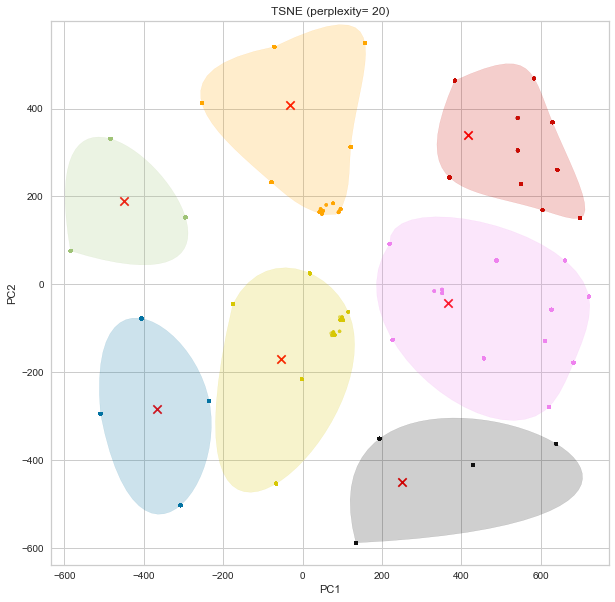

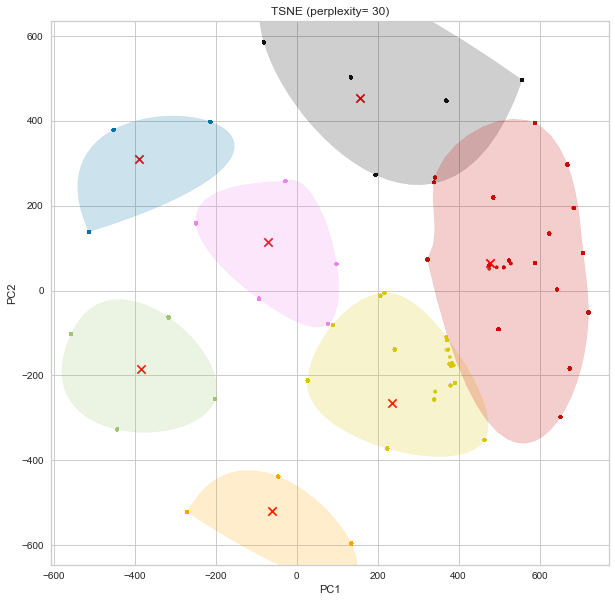

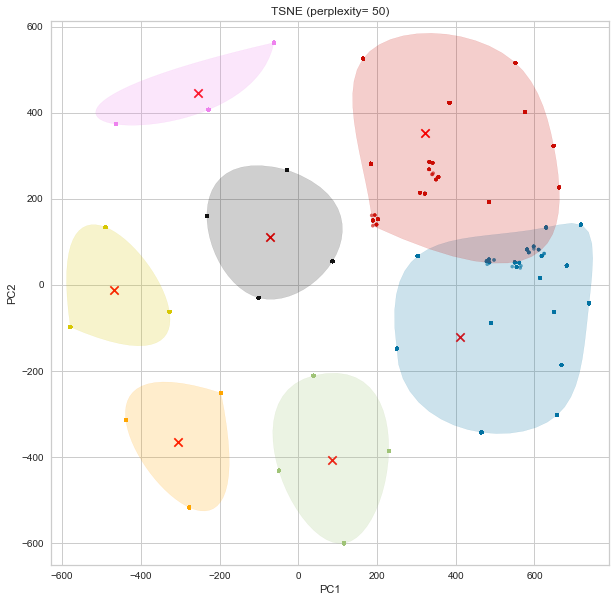

In [28]:
draw_clusters(clusters, perplexities)

Les clusters sont le mieux différenciés avec le jeu de données issu du TSNE avec perplexity= 20.

In [29]:
X = pd.read_csv("POLIST_11_tsne_20.csv")

kmean = KMeans(7)

rfm_datas["labels"] = kmean.fit_predict(X)
rfm_datas

,customer_unique_id,recency,frequency,monetary,r_quintiles,f_quintiles,m_quintiles,rfm_score,labels
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,414,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411,2
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,4
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,3
...,...,...,...,...,...,...,...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,1,1,5,115,3
92827,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,1,2,312,4
92828,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,1,3,113,1
92829,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,1,4,414,5


In [30]:
rfm_gpb = rfm_datas.groupby(["labels", "rfm_score"], as_index=False)["customer_unique_id"].count()
rfm_gpb.rename({"customer_unique_id": "label_count"}, axis= 1)
# rfm_gpb = rfm_gpb.merge(rfm_datas[["labels", "rfm_score"]], on= "labels")
rfm_gpb

,labels,rfm_score,customer_unique_id
0,0,315,3264
1,0,353,79
2,0,354,163
3,0,355,343
4,0,415,3445
5,0,453,71
6,0,454,143
7,0,455,317
8,0,515,3459
9,0,551,5


In [31]:
rfm_gpb_2 = rfm_datas.groupby("labels", as_index=False)[["r_quintiles", "f_quintiles", "m_quintiles"]].mean()
rfm_gpb_2

,labels,r_quintiles,f_quintiles,m_quintiles
0,0,4.018909,1.581898,4.914615
1,1,1.236931,1.000000,2.219415
2,2,4.345655,1.000000,1.322132
3,3,1.507738,1.246787,4.499171
4,4,2.503699,1.000000,1.505499
5,5,3.489951,1.038459,3.485878
6,6,5.000000,1.000000,3.020236
